In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
print(os.listdir("D:Laptop Lama/Dika Nitip/semester 7/machine learning"))

['archive.zip', 'asl_alphabet_test', 'asl_alphabet_train', 'praktikum', 'tugas']


In [3]:
train_folder = 'D:/Laptop Lama/Dika Nitip/semester 7/machine learning/asl_alphabet_train/asl_alphabet_train'
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    #print(onlyfiles)
    all_data += onlyfiles
data_df = pd.DataFrame(all_data)
data_df

,label,path
0,A,D:/Laptop Lama/Dika Nitip/semester 7/machine l...
1,A,D:/Laptop Lama/Dika Nitip/semester 7/machine l...
2,A,D:/Laptop Lama/Dika Nitip/semester 7/machine l...
3,A,D:/Laptop Lama/Dika Nitip/semester 7/machine l...
4,A,D:/Laptop Lama/Dika Nitip/semester 7/machine l...
...,...,...
86995,Z,D:/Laptop Lama/Dika Nitip/semester 7/machine l...
86996,Z,D:/Laptop Lama/Dika Nitip/semester 7/machine l...
86997,Z,D:/Laptop Lama/Dika Nitip/semester 7/machine l...
86998,Z,D:/Laptop Lama/Dika Nitip/semester 7/machine l...


In [4]:
x_train,x_holdout = train_test_split(data_df, test_size= 0.20, random_state=42,stratify=data_df[['label']])
x_train,x_test = train_test_split(x_train, test_size= 0.30, random_state=42,stratify=x_train[['label']])

In [5]:
img_width, img_height = 64, 64
batch_size = 128
y_col = 'label'
x_col = 'path'
no_of_classes = len(data_df[y_col].unique())


train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height),class_mode='categorical', batch_size=batch_size,
    shuffle=False,
)

validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=x_test, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

holdout_datagen = ImageDataGenerator(rescale = 1/255.0)
holdout_generator = holdout_datagen.flow_from_dataframe(
    dataframe=x_holdout, x_col=x_col, y_col=y_col,
    target_size=(img_width, img_height), class_mode='categorical', batch_size=batch_size,
    shuffle=False
)

Found 48720 validated image filenames belonging to 29 classes.
Found 20880 validated image filenames belonging to 29 classes.
Found 17400 validated image filenames belonging to 29 classes.


In [6]:
base_model = ResNet50V2(input_shape=(64, 64, 3), include_top=False, weights="imagenet")
base_model.trainable = False ## Not trainable weights

94668760/94668760 [==============================] - 46s 0us/step


In [7]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 34, 34, 64)   0           ['conv1_conv[0][0]']             
                                                                                         

                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 16, 16, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 8, 8, 512)    0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_conv[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 6, 6, 256)   0           ['conv4_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, 4, 4, 256)    589824      ['conv4_block1_2_pad[0][0]']     
          

                                                                                                  
 conv4_block3_out (Add)         (None, 4, 4, 1024)   0           ['conv4_block2_out[0][0]',       
                                                                  'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_block4_preact_bn (BatchN  (None, 4, 4, 1024)  4096        ['conv4_block3_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv4_block4_preact_relu (Acti  (None, 4, 4, 1024)  0           ['conv4_block4_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 2, 2, 256)    589824      ['conv4_block6_2_pad[0][0]']     
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 2, 2, 1024)  0           ['conv4_block5_out[0][0]']       
          

                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 2, 2, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 2, 2, 512)    1048576     ['conv5_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, 2, 2, 512)   2048        ['conv5_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

In [8]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout_layer_1 = layers.Dropout(0.5)
prediction_layer = layers.Dense(29, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout_layer_1,
    prediction_layer
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 29)                14877     
                                                                 
Total params: 27,774,493
Trainable params: 4,209,693
Non-trainable params: 23,564,800
_________________________________________________________________


In [19]:
classes = 29
epochs = 50
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    validation_data=validation_generator, shuffle=True)

Epoch 1/50


C:\Users\Brilino Pradika\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


381/381 [==============================] - 192s 497ms/step - loss: 0.0889 - accuracy: 0.9761 - val_loss: 0.0509 - val_accuracy: 0.9887
Epoch 2/50
381/381 [==============================] - 188s 494ms/step - loss: 0.0632 - accuracy: 0.9839 - val_loss: 0.0416 - val_accuracy: 0.9899
Epoch 3/50
381/381 [==============================] - 185s 485ms/step - loss: 0.0488 - accuracy: 0.9885 - val_loss: 0.0354 - val_accuracy: 0.9914
Epoch 4/50
381/381 [==============================] - 191s 502ms/step - loss: 0.0411 - accuracy: 0.9900 - val_loss: 0.0323 - val_accuracy: 0.9921
Epoch 5/50
381/381 [==============================] - 189s 497ms/step - loss: 0.0333 - accuracy: 0.9922 - val_loss: 0.0270 - val_accuracy: 0.9928
Epoch 6/50
381/381 [==============================] - 188s 494ms/step - loss: 0.0273 - accuracy: 0.9941 - val_loss: 0.0242 - val_accuracy: 0.9935
Epoch 7/50
381/381 [==============================] - 192s 505ms/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.0230 - val_accura

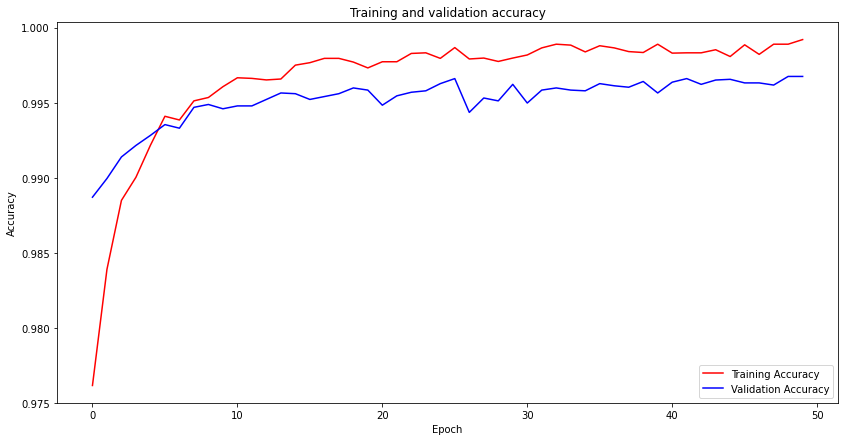

In [20]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

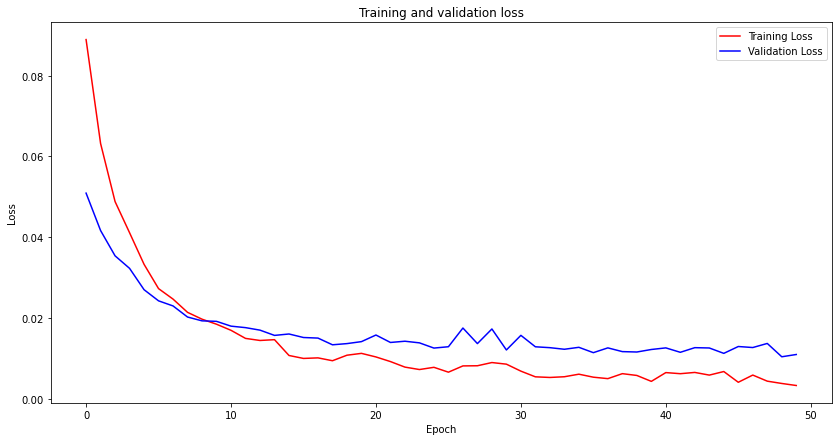

In [21]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [22]:
predictions = model.predict(holdout_generator, verbose=1)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1) #multiple categories

true_classes = holdout_generator.classes
class_labels = list(holdout_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

136/136 [==============================] - 108s 794ms/step
              precision    recall  f1-score   support

           A       1.00      0.99      1.00       600
           B       1.00      1.00      1.00       600
           C       1.00      1.00      1.00       600
           D       1.00      1.00      1.00       600
           E       1.00      0.99      0.99       600
           F       1.00      1.00      1.00       600
           G       1.00      1.00      1.00       600
           H       1.00      1.00      1.00       600
           I       1.00      1.00      1.00       600
           J       1.00      1.00      1.00       600
           K       1.00      1.00      1.00       600
           L       1.00      1.00      1.00       600
           M       0.99      1.00      0.99       600
           N       1.00      0.99      0.99       600
           O       1.00      1.00      1.00       600
           P       1.00      1.00      1.00       600
           Q       1.0

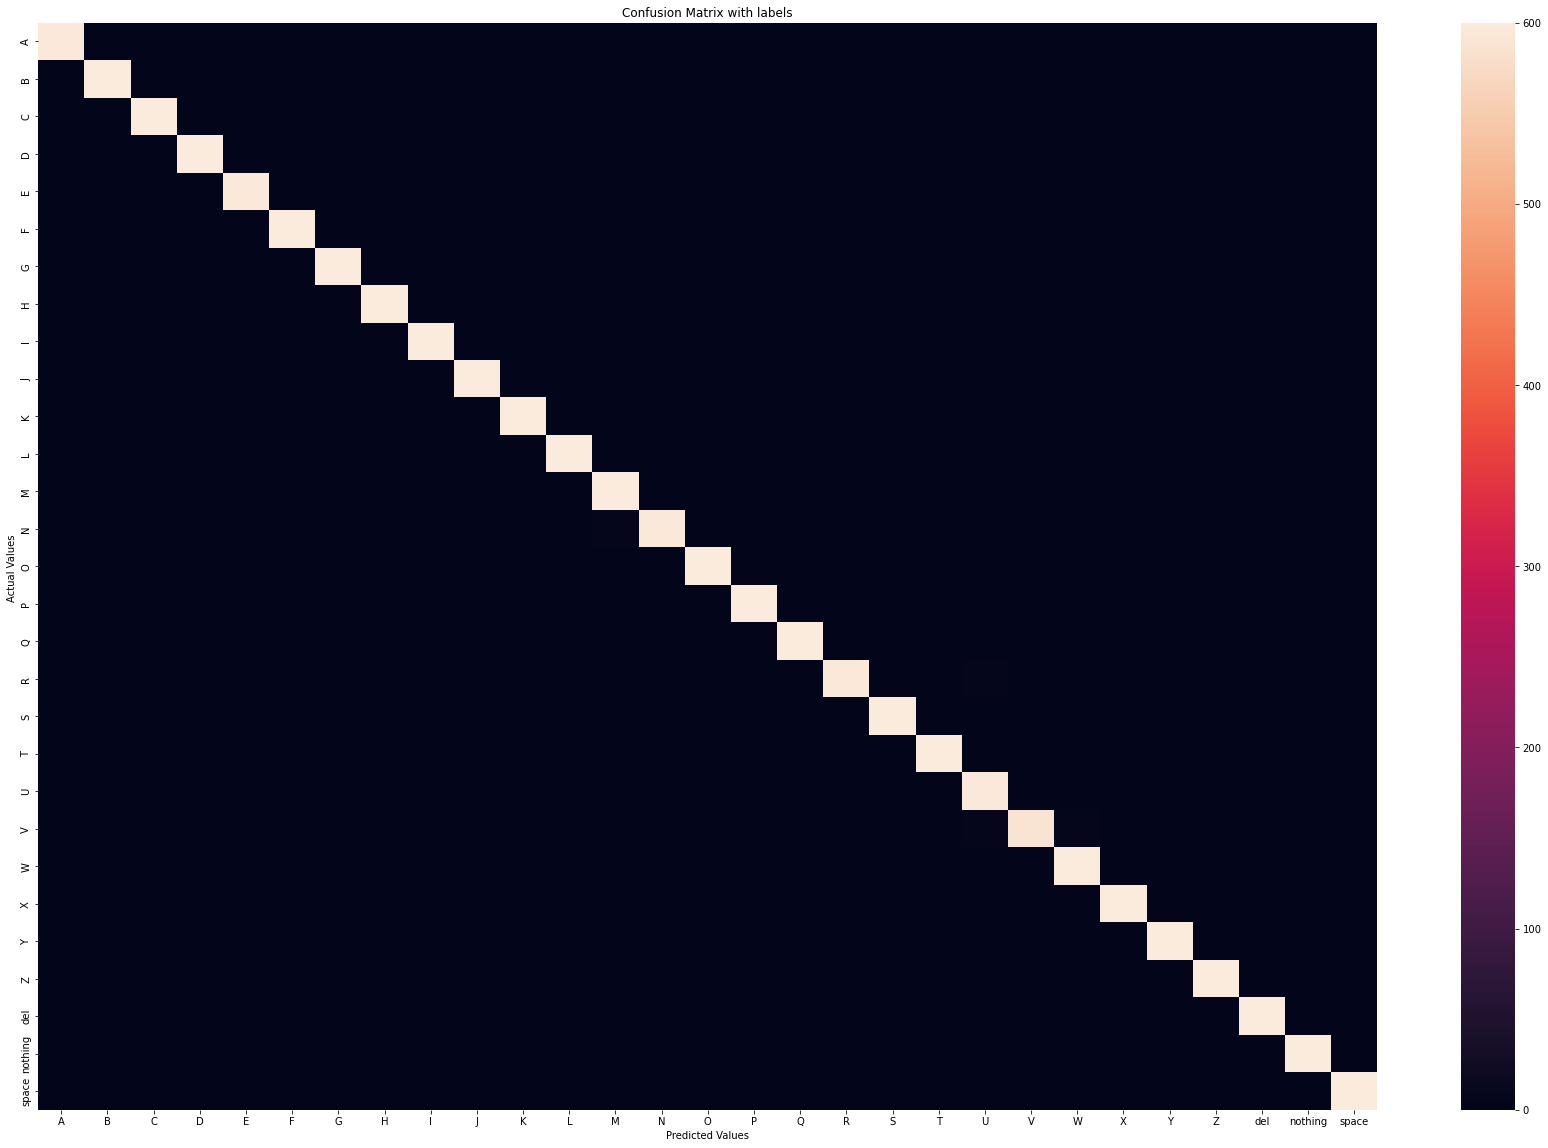

In [23]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(true_classes,predicted_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [24]:
model.save('ResNet50V2.h5')

In [25]:
confusion = metrics.confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[597   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0   0]
 [  0 600   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 600   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 599   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 593   2   0   0   0   0   0   0   0   0   0   0   0   1
    2   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0 599   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 599   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 600   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 

<AxesSubplot:>

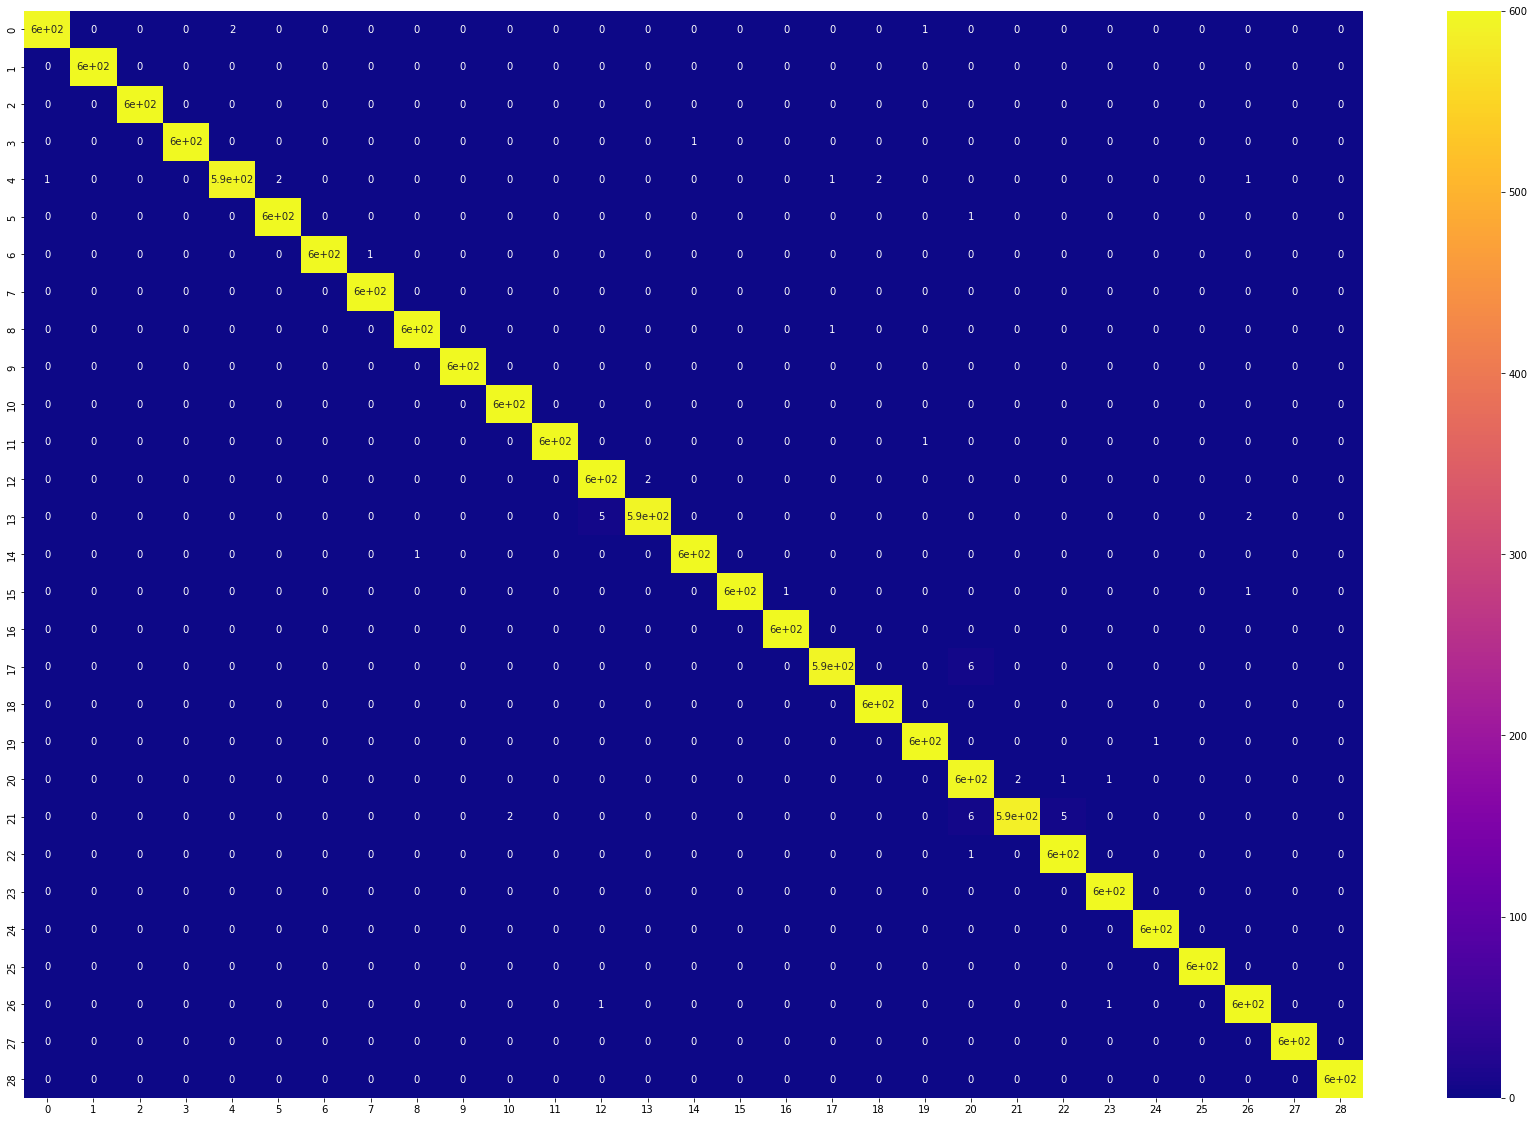

In [26]:
plt.figure(figsize=(30, 20))
sns.heatmap(confusion, cmap="plasma", annot=True)